$$ Credit \space Score $$
$$ Deep \space Learning $$
$$ ANN \space Model $$

# Introduction

> Use the `keras` from Tensorflow to build ANN model that would fit the credit score data and be able to generalize well.

Use the Credit Score Classification dataset provided [here](https://www.kaggle.com/datasets/parisrohan/credit-score-classification) to train and test your design.

**Notes:**
- Split the data as you see fit and use validation during training.
- You may re-use the EDA, data preparation, and other sections you previously used in ML1 assignemnts.
- Remember that you can use classification metrics from other libraries as well (e.g., `sklearn`)
- Plot the loss, and accuracy against epochs and extract insights on how well of a fit your model is.
- This time the notebook is not prepared with sections and instructions so that you can do it yourself.
- If you are stuck, you can consult the [Keras User Guide](https://keras.io/api/). There are some useful [Code Examples](https://keras.io/examples/) as well.


# `01` Import Necessary Libraries

In [108]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import Input
from keras.utils import set_random_seed
from keras.callbacks import EarlyStopping

pd.set_option('display.max_columns', None)

import warnings
warnings.simplefilter("ignore")

set_random_seed(1234)

----------------------------

# `02` Load & Split Data

Note: This is the `Cleaned Data` from ML1 assignments.

In [78]:
X_train = pd.read_csv('/content/X_train_cleaned.csv')
X_val = pd.read_csv('/content/X_val_cleaned.csv')
X_test = pd.read_csv('/content/X_test_cleaned.csv')

y_train = pd.read_csv('/content/y_train_cleaned.csv')
y_val = pd.read_csv('/content/y_val_cleaned.csv')
y_test = pd.read_csv('/content/y_test_cleaned.csv')

X_train.head().style.background_gradient(cmap='Blues')

,Delay_from_due_date,Outstanding_Debt,Credit_Mix,Payment_of_Min_Amount,Num_Credit_Inquiries,Interest_Rate,Changed_Credit_Limit
0,0.441222,-0.352183,2,0,-0.730168,0.621055,0.220544
1,-1.538789,-1.065845,1,0,-0.470839,-0.982221,-0.798401
2,-1.005709,0.073799,2,0,-1.508155,-0.638662,-0.116002
3,-0.472629,-0.538956,2,1,0.825805,-0.409622,0.521420
4,0.136605,-0.530580,2,1,0.307147,0.162976,0.121286


In [79]:
X_train.shape

(32358, 7)

In [91]:
y_train.value_counts()

,count
0,
3,17075
1,9514
0,5768


In [85]:
# remove nan value
mask = y_train.values.flatten() != 2
X_train = X_train[mask]
y_train = y_train[mask]

In [100]:
# encode due to make it within 0,1,2
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
y_val = label_encoder.transform(y_val)

---
## `#` About Data:
- You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information.
-  This is the cleaned , splitted and encoded data which contains the important features. <br>
---
- The columns are as follows, their names are pretty self explanitory:
 - `Delay_from_due_date`: The average number of days a payment is delayed from its due date.  
- `Outstanding_Debt`: The total amount of debt the customer still owes in USD.  
- `Credit_Mix`: Classification of the types of credit accounts (e.g., revolving, installment).  
- `Payment_of_Min_Amount`: Whether the customer pays only the minimum amount due on credit cards (Yes/No).  
- `Num_Credit_Inquiries`: The number of times the customer has applied for credit.  
- `Interest_Rate`: Interest rate applied to the customer’s credit card.  
- `Changed_Credit_Limit`: The percentage change in the customer’s credit limit.

- `Credit_Score`: The classification of the customer’s creditworthiness (Poor, Standard, Good).

----------------------
# `03` Model Train

Use the `keras` from Tensorflow to build ANN model that would fit the credit score data and be able to generalize well.

## `i` Baseline Model

In [101]:
# Model Build
model = Sequential()
model.add(Input((7,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 32)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355 (1.39 KB)

 Trainable params: 355 (1.39 KB)

 Non-trainable params: 0 (0.00 B)

In [102]:
model.compile(keras.optimizers.Adam(0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [103]:
history = model.fit(X_train, y_train, batch_size=32, epochs=200, validation_split=0.15)

Epoch 1/200
860/860 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6270 - loss: 0.7986 - val_accuracy: 0.6714 - val_loss: 0.7274
Epoch 2/200
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6587 - loss: 0.7527 - val_accuracy: 0.6792 - val_loss: 0.7194
Epoch 3/200
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6612 - loss: 0.7482 - val_accuracy: 0.6829 - val_loss: 0.7162
Epoch 4/200
860/860 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6613 - loss: 0.7457 - val_accuracy: 0.6852 - val_loss: 0.7147
Epoch 5/200
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6620 - loss: 0.7441 - val_accuracy: 0.6887 - val_loss: 0.7162
Epoch 6/200
860/860 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6628 - loss: 0.7429 - val_accuracy: 0.6827 - val_loss: 0.7130
Epoch 7/200
860/860 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6623 - loss: 0.7416 - val_accuracy: 0.6856 - val_loss: 0.7122
Epoch 8/200
860/860 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6637 - loss: 0.7407 - val_accu

---
## `ii` Early Stopped Model

In [104]:
Early_model = Sequential()
Early_model.add(Dense(32, activation='relu', input_shape=(7,)))
Early_model.add(Dense(3, activation='softmax'))
Early_model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 32)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355 (1.39 KB)

 Trainable params: 355 (1.39 KB)

 Non-trainable params: 0 (0.00 B)

In [105]:
Early_model.compile(keras.optimizers.Adam(0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [106]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [107]:
Early_history = Early_model.fit(X_train, y_train, batch_size=32, epochs=200, validation_split=0.15)

Epoch 1/200
860/860 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6336 - loss: 0.7853 - val_accuracy: 0.6588 - val_loss: 0.7282
Epoch 2/200
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6578 - loss: 0.7538 - val_accuracy: 0.6679 - val_loss: 0.7222
Epoch 3/200
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6611 - loss: 0.7494 - val_accuracy: 0.6733 - val_loss: 0.7176
Epoch 4/200
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6604 - loss: 0.7469 - val_accuracy: 0.6776 - val_loss: 0.7152
Epoch 5/200
860/860 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6627 - loss: 0.7450 - val_accuracy: 0.6776 - val_loss: 0.7154
Epoch 6/200
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6650 - loss: 0.7442 - val_accuracy: 0.6831 - val_loss: 0.7144
Epoch 7/200
860/860 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6627 - loss: 0.7431 - val_accuracy: 0.6834 - val_loss: 0.7139
Epoch 8/200
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6643 - loss: 0.7425 - val_accu

----------------------
# `03` Model Evaluate


## `i` Baseline Model

In [110]:
loss, accuracy = model.evaluate(X_val, y_val)
print(f"val Loss: {loss:.4f}, val Accuracy: {accuracy:.4%}")

338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6741 - loss: 0.7345
val Loss: 0.7236, val Accuracy: 68.1068%


In [111]:
y_pred = np.argmax(model.predict(X_val), axis=1)
print(classification_report(y_val, y_pred))

338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.51      0.68      0.58      1932
           1       0.68      0.65      0.66      3017
           2       0.76      0.70      0.73      5837

    accuracy                           0.68     10786
   macro avg       0.65      0.68      0.66     10786
weighted avg       0.70      0.68      0.68     10786



---
## `ii` Early Stopped Model

In [112]:
Early_loss,  Early_accuracy = Early_model.evaluate(X_val, y_val)
print(f"val Loss: {loss:.4f}, val Accuracy: {accuracy:.4%}")

338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6690 - loss: 0.7472
val Loss: 0.7236, val Accuracy: 68.1068%


In [115]:
y_pred = np.argmax(Early_model.predict(X_val), axis=1)
print(classification_report(y_val, y_pred))

338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

           0       0.51      0.62      0.56      1932
           1       0.68      0.65      0.66      3017
           2       0.75      0.71      0.73      5837

    accuracy                           0.68     10786
   macro avg       0.64      0.66      0.65     10786
weighted avg       0.69      0.68      0.68     10786



----------------------
# `04` Visualization

## `i` Baseline Model

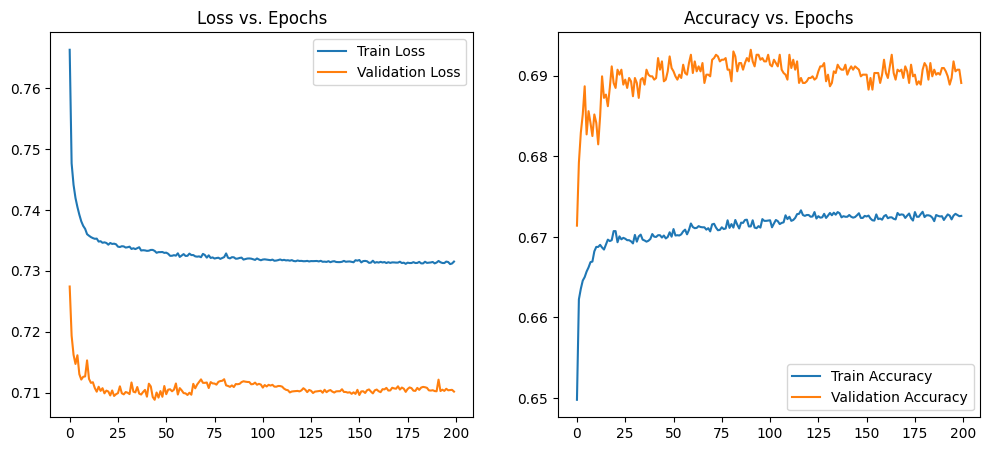

In [114]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss vs. Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy vs. Epochs')

plt.show()

---
## `ii` Early Stopped Model

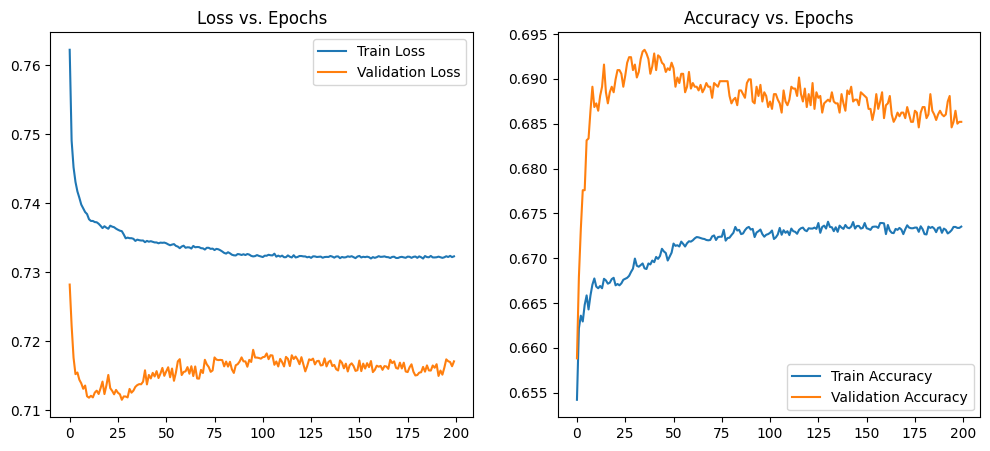

In [116]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(Early_history.history['loss'], label='Train Loss')
plt.plot(Early_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss vs. Epochs')

plt.subplot(1, 2, 2)
plt.plot(Early_history.history['accuracy'], label='Train Accuracy')
plt.plot(Early_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy vs. Epochs')

plt.show()

----------------------
# `05` Generalization Error

In [118]:
Early_loss_train,  Early_accuracy_train = Early_model.evaluate(X_train, y_train, verbose=0)
Early_loss_val,  Early_accuracy_val = Early_model.evaluate(X_val, y_val, verbose=0)
Early_loss_test,  Early_accuracy_test = Early_model.evaluate(X_test, y_test, verbose=0)

print(f"Train Loss: {Early_loss_train:.4f}, Train Accuracy: {Early_accuracy_train:.4%}")
print(f"Validation Loss: {Early_loss_val:.4f}, Validation Accuracy: {Early_accuracy_val:.4%}")
print(f"Test Loss: {Early_loss_test:.4f}, Test Accuracy: {Early_accuracy_test:.4%}")

Train Loss: 0.7313, Train Accuracy: 67.8277%
Validation Loss: 0.7350, Validation Accuracy: 67.7545%
Test Loss: 0.7297, Test Accuracy: 68.0048%


----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
